In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

# 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

## Summary
* 绘图例子
[reference](https://www.jianshu.com/p/74d878528d60)
* 注意数据缺失
np.isnan() and pd.isnull()

In [3]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

In [28]:
import numpy as np
import pandas as pd
cls_survived_data = data.groupby(['pclass','survived']).size()

In [48]:
print(cls_survived_data)
cls_survived_data.index

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


MultiIndex(levels=[[1, 2, 3], [0, 1]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['pclass', 'survived'])

In [61]:
# plt.bar(cls_survived_data)
cls_survived_data.index

MultiIndex(levels=[[1, 2, 3], [0, 1]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['pclass', 'survived'])

80
136
97
87
372
119
[136, 87, 119]
[80, 97, 372]


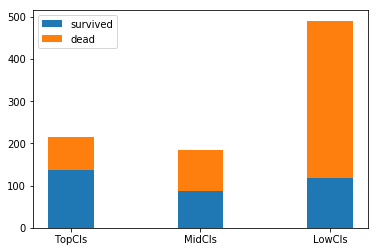

In [74]:
cs=[]
cd=[]
cls = ['TopCls', 'MidCls', 'LowCls']
for i in cls_survived_data.index.tolist():
    _, s = i
    if s==1:
        cs.append(cls_survived_data[i])
    else:
        cd.append(cls_survived_data[i])
    print(cls_survived_data[i])
width = 0.35
p1=plt.bar(cls, cs, width)
p2=plt.bar(cls, cd, width, bottom=cs)
print(cs)
print(cd)
plt.legend((p1[0],p2[0]),('survived','dead'))

   mean1  mean2  std1  std2
A      4      6     1     3
B      5      7     5     2


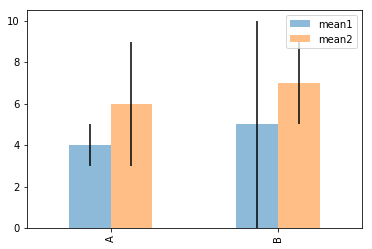

In [70]:
df = pd.DataFrame([[4,6,1,3], [5,7,5,2]], columns = ['mean1', 'mean2', 'std1', 'std2'], index=['A', 'B'])
print(df)

df[['mean1', 'mean2']].plot(kind='bar', yerr=df[['std1', 'std2']].values.T, alpha = 0.5,error_kw=dict(ecolor='k'))
plt.show()

## 不同性别的幸存比例（堆积柱状图）

In [76]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [82]:
sex_survived_data=data.groupby(['who','survived']).size()
sex_survived_data

who    survived
child  0            34
       1            49
man    0           449
       1            88
woman  0            66
       1           205
dtype: int64

In [83]:
sex_survived_data.index.tolist()

[('child', 0),
 ('child', 1),
 ('man', 0),
 ('man', 1),
 ('woman', 0),
 ('woman', 1)]

34
49
449
88
66
205
[49, 88, 205]
[34, 449, 66]


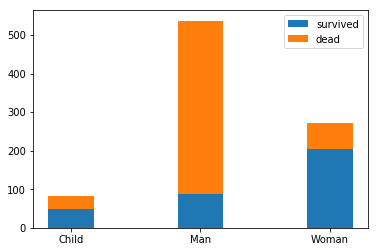

In [84]:
cs=[]
cd=[]
cls = ['Child', 'Man', 'Woman']
for i in sex_survived_data.index.tolist():
    _, s = i
    if s==1:
        cs.append(sex_survived_data[i])
    else:
        cd.append(sex_survived_data[i])
    print(sex_survived_data[i])
width = 0.35
p1=plt.bar(cls, cs, width)
p2=plt.bar(cls, cd, width, bottom=cs)
print(cs)
print(cd)
plt.legend((p1[0],p2[0]),('survived','dead'))

## 幸存和遇难乘客的票价分布（分类箱式图）

In [96]:
sur_fare_data=data[data.survived==1]['fare']
dead_fare_data=data[data.survived==0]['fare']
print(dead_fare_data.count())
print(sur_fare_data.count())

549
342


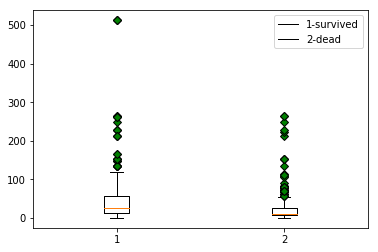

In [101]:
green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(np.array([sur_fare_data, dead_fare_data]), flierprops=green_diamond)
plt.legend(['1-survived','2-dead'])

## 幸存和遇难乘客的年龄分布（分类箱式图）

In [118]:
sur_age_data=data[data.survived==1]['age']
dead_age_data=data[data.survived==0]['age']

sur_age_data = sur_age_data.fillna(0)
dead_age_data = dead_age_data.fillna(0)
print(sur_age_data.head())
print(dead_age_data.head())
print(sur_age_data.count())
print(dead_age_data.count())

1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: age, dtype: float64
0    22.0
4    35.0
5     0.0
6    54.0
7     2.0
Name: age, dtype: float64
342
549


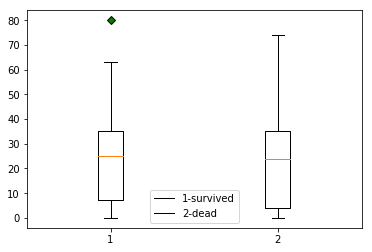

In [119]:
green_diamond = dict(markerfacecolor='g', marker='D')
age_data = np.array([sur_age_data, dead_age_data])
plt.boxplot(age_data, flierprops=green_diamond)
plt.legend(['1-survived','2-dead'])

## 不同上船港口的乘客仓位等级分布（分组柱状图）

In [121]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [123]:

city_survived_data=data.groupby(['embark_town','survived']).size()
city_survived_data

embark_town  survived
Cherbourg    0            75
             1            93
Queenstown   0            47
             1            30
Southampton  0           427
             1           217
dtype: int64

75
93
47
30
427
217
[93, 30, 217]
[75, 47, 427]


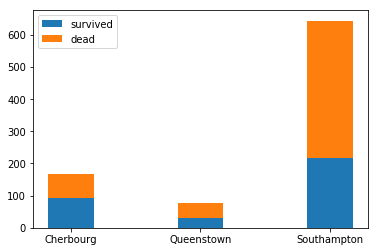

In [124]:
cs=[]
cd=[]
cls = ['Cherbourg', 'Queenstown', 'Southampton']
for i in city_survived_data.index.tolist():
    _, s = i
    if s==1:
        cs.append(city_survived_data[i])
    else:
        cd.append(city_survived_data[i])
    print(city_survived_data[i])
width = 0.35
p1=plt.bar(cls, cs, width)
p2=plt.bar(cls, cd, width, bottom=cs)
print(cs)
print(cd)
plt.legend((p1[0],p2[0]),('survived','dead'))

## 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）


In [133]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [134]:
data['sibsp'].isnull().describe()

count       891
unique        1
top       False
freq        891
Name: sibsp, dtype: object

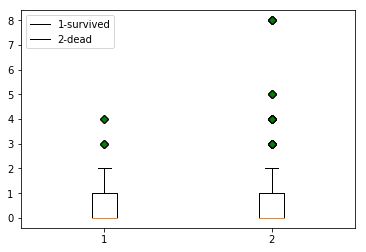

In [136]:
sur_sibsp_data=data[data.survived==1]['sibsp']
dead_sibsp_data=data[data.survived==0]['sibsp']
green_diamond = dict(markerfacecolor='g', marker='D')
sibsp_data = np.array([sur_sibsp_data, dead_sibsp_data])
plt.boxplot(sibsp_data, flierprops=green_diamond)
plt.legend(['1-survived','2-dead'])

## 幸存和遇难乘客父母子女的数量分布（分类箱式图）


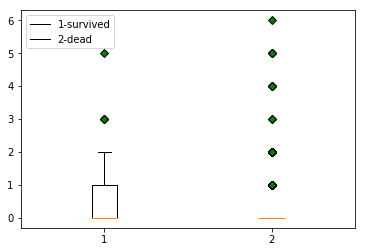

In [137]:
sur_parch_data=data[data.survived==1]['parch']
dead_parch_data=data[data.survived==0]['parch']
green_diamond = dict(markerfacecolor='g', marker='D')
parch_data = np.array([sur_parch_data, dead_parch_data])
plt.boxplot(parch_data, flierprops=green_diamond)
plt.legend(['1-survived','2-dead'])

In [139]:
dead_parch_data.describe()

count    549.000000
mean       0.329690
std        0.823166
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64

## 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [141]:
alone_survived_data=data.groupby(['alone','survived']).size()
alone_survived_data

alone  survived
False  0           175
       1           179
True   0           374
       1           163
dtype: int64

175
179
374
163
[179, 163]
[175, 374]


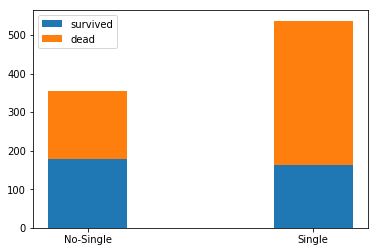

In [142]:
cs=[]
cd=[]
cls = ['No-Single', 'Single']
for i in alone_survived_data.index.tolist():
    _, s = i
    if s==1:
        cs.append(alone_survived_data[i])
    else:
        cd.append(alone_survived_data[i])
    print(alone_survived_data[i])
width = 0.35
p1=plt.bar(cls, cs, width)
p2=plt.bar(cls, cd, width, bottom=cs)
print(cs)
print(cd)
plt.legend((p1[0],p2[0]),('survived','dead'))

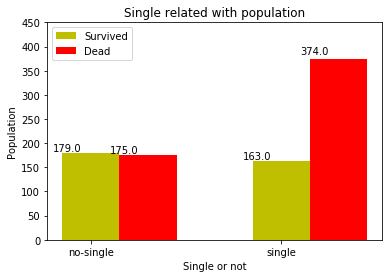

In [148]:
#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))
    

#l1=[68, 96, 85, 86, 76, 87, 95]
#l2=[85, 68, 79, 89, 94, 82, 90]

#name=['A','B','C','D','E','F','E']
name=['no-single','single']
total_width, n = 0.6, 2
width = total_width / n
x=[0,1]

a=plt.bar(x, cs, width=width, label='Survived',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
b=plt.bar(x, cd, width=width, label='Dead',tick_label = name,fc = 'r')

autolabel(a)
autolabel(b)

plt.xlabel('Single or not')
plt.ylabel('Population')
plt.xticks(np.arange(2), ("no-single", "single"))
plt.yticks(np.arange(0,460,50))
plt.title('Single related with population')
plt.legend()
plt.show()